In [1]:
import matplotlib.pyplot as plt
from a_star import AStarPlanner
import numpy as np
from hungarian_algorithm import algorithm

In [2]:
gx = 50.0  # [m]
gy = 50.0  # [m]
grid_size = 2.0  # [m]
robot_radius = 1.0  # [m]

In [ ]:
def rectangle(cx, cy, width height):
    


In [3]:
ox, oy = [], []
for i in range(-10, 60):
    ox.append(i)
    oy.append(-10.0)
for i in range(-10, 60):
    ox.append(60.0)
    oy.append(i)
for i in range(-10, 61):
    ox.append(i)
    oy.append(60.0)
for i in range(-10, 61):
    ox.append(-10.0)
    oy.append(i)
for i in range(-10, 10):
    ox.append(i)
    oy.append(20.0)
for i in range(0, 40):
    ox.append(40.0)
    oy.append(60.0 - i)
x_c = [10,50,20,30]
y_c = [40,10,10,30]
for k in range(4):
    radius = 5
    x_center = x_c[k]
    y_center = y_c[k]
    for i in np.linspace(0,2*np.pi, 20):
        ox.append(radius*np.cos(i) + x_center)
        oy.append(radius*np.sin(i) + y_center)

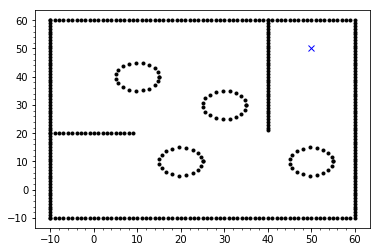

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x_ticks = np.arange(round(min(ox)), round(max(ox)), grid_size)
y_ticks = np.arange(round(min(oy)), round(max(oy)), grid_size)
ax.set_xticks(x_ticks, minor=True)
ax.set_yticks(y_ticks, minor=True)

ax.plot(ox, oy, ".k")
ax.plot(gx, gy, "xb")
# ax.grid(which='both')
# ax.grid(which='minor', alpha=0.3)
plt.show()


In [5]:
def get_points(num, x_c, y_c):
    points = np.empty((0,2))
    while len(points) < num:
        t = 60 * np.random.random_sample((1,2)) - 5
        is_in_obstacle = False
        for k in range(len(x_c)):
            temp = t - np.array([x_c[k], y_c[k]])
#             print(temp)
            if np.sqrt(temp[0,0] * temp[0,0] + temp[0,1] * temp[0,1]) <= 6:
                is_in_obstacle = True
                break
        if not is_in_obstacle:
            points = np.concatenate((points,t))
    return points

In [6]:
def construct_dist_dic(w,p):
    dist_map = np.zeros((len(w), len(p)))
    for i in range(len(w)):
        for j in range(len(p)):
            diff = w[i,:] - p[j,:]
#             print(diff)
            dist_map[i,j] = np.sqrt(diff[0]*diff[0] + diff[1]*diff[1])
    dist_map = dist_map.astype(int)
#     print(dist_map)
    dist_dict = {"worker_"+str(i):{"trolley_"+str(j):dist_map[i,j] for j in range(len(p))} for i in range(len(w))}
    return dist_dict, dist_map

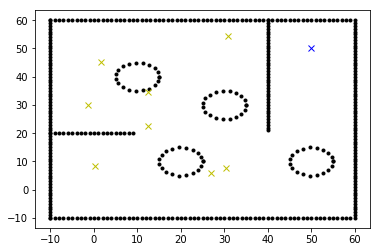

In [31]:
num_trolley = 8
p = get_points(num_trolley,x_c, x_c)
    
plt.plot(ox, oy, ".k")
plt.plot(gx, gy, "xb")
plt.plot(p[:,0], p[:,1], "xy")
plt.grid(which='minor', alpha=0.3)

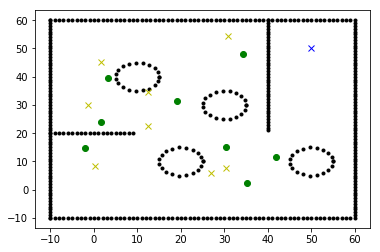

In [32]:
num_worker = 8
w = get_points(num_worker,x_c, x_c)

plt.plot(ox, oy, ".k")
plt.plot(gx, gy, "xb")
plt.plot(p[:,0], p[:,1], "xy")
plt.plot(w[:,0], w[:,1], "og")
plt.grid(which='minor', alpha=0.3)

In [33]:
print(w[0,:])
print(p[0,:])

[ 1.69562632 24.13971268]
[12.36083424 22.66143263]


In [34]:
dist_dict,_ = construct_dist_dic(w,p)
print(dist_dict)

{'worker_0': {'trolley_0': 10, 'trolley_1': 33, 'trolley_2': 42, 'trolley_3': 15, 'trolley_4': 31, 'trolley_5': 6, 'trolley_6': 21, 'trolley_7': 15}, 'worker_1': {'trolley_0': 30, 'trolley_1': 7, 'trolley_2': 52, 'trolley_3': 35, 'trolley_4': 9, 'trolley_5': 45, 'trolley_6': 54, 'trolley_7': 39}, 'worker_2': {'trolley_0': 19, 'trolley_1': 41, 'trolley_2': 31, 'trolley_3': 31, 'trolley_4': 40, 'trolley_5': 10, 'trolley_6': 6, 'trolley_7': 10}, 'worker_3': {'trolley_0': 33, 'trolley_1': 40, 'trolley_2': 7, 'trolley_3': 52, 'trolley_4': 42, 'trolley_5': 39, 'trolley_6': 32, 'trolley_7': 25}, 'worker_4': {'trolley_0': 31, 'trolley_1': 12, 'trolley_2': 44, 'trolley_3': 41, 'trolley_4': 15, 'trolley_5': 47, 'trolley_6': 52, 'trolley_7': 37}, 'worker_5': {'trolley_0': 16, 'trolley_1': 33, 'trolley_2': 51, 'trolley_3': 6, 'trolley_4': 30, 'trolley_5': 15, 'trolley_6': 30, 'trolley_7': 24}, 'worker_6': {'trolley_0': 19, 'trolley_1': 7, 'trolley_2': 39, 'trolley_3': 30, 'trolley_4': 9, 'trolley_

In [35]:
result = algorithm.find_matching(dist_dict, matching_type = 'min', return_type = 'list')
print(result)

[(('worker_7', 'trolley_7'), 7), (('worker_5', 'trolley_3'), 6), (('worker_6', 'trolley_0'), 19), (('worker_0', 'trolley_5'), 6), (('worker_4', 'trolley_1'), 12), (('worker_1', 'trolley_4'), 9), (('worker_3', 'trolley_2'), 7), (('worker_2', 'trolley_6'), 6)]


min_x: -10
min_y: -10
max_x: 60
max_y: 60
x_width: 35
y_width: 35
326.0782104868018


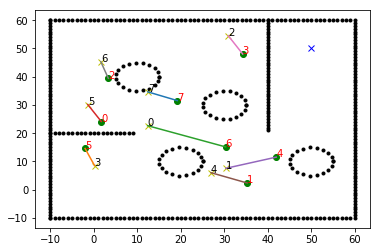

In [36]:
a_star = AStarPlanner(ox, oy, grid_size, robot_radius)
plt.plot(ox, oy, ".k")
plt.plot(gx, gy, "xb")
plt.plot(p[:,0], p[:,1], "xy")
plt.plot(w[:,0], w[:,1], "og")
cost = 0
for m in result:
    w_ind = int(m[0][0][-1])
    t_ind = int(m[0][1][-1])
    x = [w[w_ind,0], p[t_ind,0]]
    y = [w[w_ind,1], p[t_ind,1]]
    plt.plot(x, y)
    plt.annotate(str(w_ind), (w[w_ind,0],w[w_ind,1]), color="red")
    plt.annotate(str(t_ind), (p[t_ind,0],p[t_ind,1]))
    rx, ry, s = a_star.planning(w[w_ind,0], w[w_ind,1], p[t_ind,0], p[t_ind,1])
    cost = cost + s
    rx, ry, s = a_star.planning(p[t_ind,0],p[t_ind,1], gx, gy)
    cost = cost + s
print(cost)

326.90663761154804


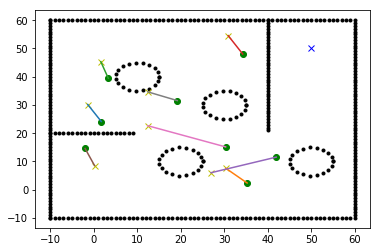

In [37]:


plt.plot(ox, oy, ".k")
plt.plot(gx, gy, "xb")
plt.plot(p[:,0], p[:,1], "xy")
plt.plot(w[:,0], w[:,1], "og")

_, dist_map = construct_dist_dic(w,p)
cost = 0
used = [False for i in range(len(p))]
for i in range(dist_map.shape[0]):
    dist = dist_map[i,:]
    inds = np.argsort(dist)
#     print(inds)
    ind = inds[0]
    for k in range(len(inds)):
        if not used[inds[k]]:
            ind = inds[k]
            used[ind] = True
            break
    x = [w[i,0], p[ind,0]]
    y = [w[i,1], p[ind,1]]
    plt.plot(x, y)
    rx, ry, s = a_star.planning(w[i,0], w[i,1], p[ind,0], p[ind,1])
    cost = cost + s
    rx, ry, s = a_star.planning(p[ind,0],p[ind,1], gx, gy)
    cost = cost + s
#     plt.annotate(str(w_ind), (w[w_ind,0],w[w_ind,1]), color="red")
#     plt.annotate(str(t_ind), (p[t_ind,0],p[t_ind,1]))
print(cost)

In [ ]:

cost = 0
for m in result:
    w_ind = int(m[0][0][-1])
    t_ind = int(m[0][1][-1])




In [27]:
total_num = 10
hist_norm = np.zeros((total_num,))
hist_ours = np.zeros((total_num,))

step = 0
while step < total_num:
    try:
        num_worker = 8
        w = get_points(num_worker,x_c, x_c)
        num_trolley = 8
        p = get_points(num_trolley,x_c, x_c)
        dist_dict,dist_map = construct_dist_dic(w,p)
        result = algorithm.find_matching(dist_dict, matching_type = 'min', return_type = 'list')

        cost = 0
        for m in result:
            w_ind = int(m[0][0][-1])
            t_ind = int(m[0][1][-1])
            x = [w[w_ind,0], p[t_ind,0]]
            y = [w[w_ind,1], p[t_ind,1]]
            rx, ry, s = a_star.planning(w[w_ind,0], w[w_ind,1], p[t_ind,0], p[t_ind,1])
            cost = cost + s
            rx, ry, s = a_star.planning(p[t_ind,0],p[t_ind,1], gx, gy)
            cost = cost + s
        
        hist_ours[step] = cost
        cost = 0
        used = [False for i in range(len(p))]
        for i in range(dist_map.shape[0]):
            dist = dist_map[i,:]
            inds = np.argsort(dist)

            ind = inds[0]
            for k in range(len(inds)):
                if not used[inds[k]]:
                    ind = inds[k]
                    used[ind] = True
                    break
            x = [w[i,0], p[ind,0]]
            y = [w[i,1], p[ind,1]]

            rx, ry, s = a_star.planning(w[i,0], w[i,1], p[ind,0], p[ind,1])
            cost = cost + s
            rx, ry, s = a_star.planning(p[ind,0],p[ind,1], gx, gy)
            cost = cost + s
            
        hist_norm[step] = cost
        step = step + 1
        print("Iter %d"%step)
    except KeyboardInterrupt: 
        raise KeyboardInterrupt
    except:
        print("error")
        continue
print(cost)

Iter 1
Iter 2
Iter 3
Iter 4
Iter 5
Iter 6
Iter 7
Iter 8
Iter 9
Iter 10
280.8944443027283


In [28]:
print(hist_norm)

[343.70562748 288.8944443  306.93607486 302.86500705 322.42135624
 370.80613255 269.79393924 294.8944443  351.5218613  280.8944443 ]


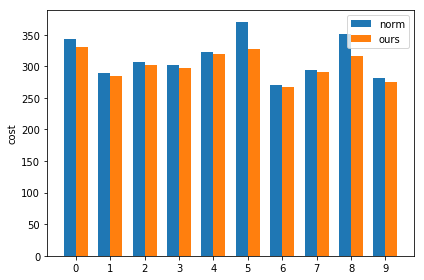

In [29]:
x = np.arange(len(hist_norm))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hist_norm, width, label='norm')
rects2 = ax.bar(x + width/2, hist_ours, width, label='ours')

ax.set_ylabel('cost')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
# ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [30]:
(np.sum(hist_norm) - np.sum(hist_ours))/np.sum(hist_ours)

0.040757181991467835